In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import distance
import utm
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [9]:
lat= [41.176722143285566, 41.17659333150621, 41.17655439127667, 41.17650569946945, 41.176299453953774, 41.17627900362027, 41.17624547777815, 41.176202177596586, 41.17614859294905, 41.17611622154435, 41.176082421338144, 41.17602948030873, 41.17597889341166, 41.17592830004511, 41.1758534641387, 41.17577749515003, 41.17572499121969, 41.175623439447854, 41.17581198812489, 41.17614181064614, 41.176288783204775, 41.176509179569, 41.17648961713961, 41.176556721224806, 41.176615142982016, 41.17667031158486, 41.17668723826763, 41.176728317944246, 41.1767909731835, 41.17682498188173, 41.17683708794725, 41.1768734732024, 41.17688578048039, 41.17697823282421, 41.177009404476685, 41.17700412396125, 41.17693330628831, 41.17690677660588, 41.176722143285566]
lon= [-8.663374078682251, -8.663148237958767, -8.663171991113469, -8.663205300454747, -8.663356182018457, -8.663306206302225, -8.663224050952005, -8.663125802345737, -8.66303063711307, -8.662972559296767, -8.662919309545142, -8.662836998924126, -8.66276275867605, -8.662690102277455, -8.662596348729322, -8.662504215313497, -8.662449233638524, -8.662352053299946, -8.66198111973919, -8.662275983882864, -8.661981753995397, -8.662574367217026, -8.66260632969649, -8.662789866973261, -8.662751840418723, -8.662899994710619, -8.66289049522976, -8.66295181033338, -8.663032619055913, -8.663010409670246, -8.663039416510253, -8.663020438038627, -8.662975567609537, -8.662940982556266, -8.663015112408349, -8.663092112819042, -8.663194326973201, -8.663181264365768, -8.663374078682251]
len(lat), len(lon)

(39, 39)

In [10]:
def lat_lon_to_x_y(lat, lon):
    """ Convert latitude-longitude pair to X-Y to be easier to plot."""
    return list(utm.from_latlon(lat, lon))[:2]

In [21]:
coor = np.array([list(utm.from_latlon(la, lo)[:2]) for la, lo in zip(lat, lon)])
x = coor[:,0]
y = coor[:,1]
x, y

(array([528235.02523252, 528254.0233572 , 528252.04774897, 528249.27478413,
        528236.70786615, 528240.90847442, 528247.81384298, 528256.0732785 ,
        528264.0785203 , 528268.96385539, 528273.44484362, 528280.37162352,
        528286.62047791, 528292.73649499, 528300.63253746, 528308.39319231,
        528313.02754752, 528321.22257667, 528352.25447739, 528327.37981257,
        528351.99568731, 528302.1940544 , 528299.52155824, 528284.09813797,
        528287.26255382, 528274.8121175 , 528275.60162407, 528270.44105055,
        528263.63614992, 528265.48437795, 528263.04618014, 528264.62238775,
        528268.38067104, 528271.2417915 , 528265.0106487 , 528258.55440653,
        528250.01148502, 528251.1185288 , 528235.02523252]),
 array([4558429.80727572, 4558415.580772  , 4558411.25018246,
        4558405.83393794, 4558382.88900513, 4558380.63496587,
        4558376.93982046, 4558372.16482655, 4558366.24712956,
        4558362.67234218, 4558358.93737372, 4558353.08696841,
       

In [22]:
x_min_max = (min(x), max(x))
y_min_max = (min(y), max(y))
x_min_max, y_min_max

((528235.0252325163, 528352.2544773894),
 (4558308.168800504, 4558461.813579076))

In [53]:
point = (min(x)+50, min(y)+60)
point

(528285.0252325163, 4558368.168800504)

In [54]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df.head()

,x,y
0,528235.025233,4.558430e+06
1,528254.023357,4.558416e+06
2,528252.047749,4.558411e+06
3,528249.274784,4.558406e+06
4,528236.707866,4.558383e+06


In [55]:
def expand(min_max, val):
    return [min_max[0]-val, min_max[1]+val]

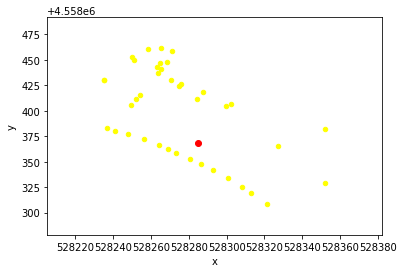

In [56]:
df.plot(kind='scatter',
        x='x',
        y='y',
        color='yellow')
plt.scatter(point[0], point[1], color='red')
plt.xlim(expand(x_min_max, 30)) #this is not properly scaled but wtv
plt.ylim(expand(y_min_max, 30))
plt.show()

In [35]:
def point_to_pol(x, y, point):
    minimum = float('inf')
    for vertex in zip(x, y):
        d = distance.euclidean(point, vertex)
        if d < minimum:
            print('v: ', vertex)
            print('p: ', point)
            print(d)
            
            minimum = d
    return minimum

In [36]:
point_to_pol(x, y, point)

v:  (528235.0252325163, 4558429.807275719)
p:  (528225.0252325163, 4558298.168800504)
132.01775697589557
v:  (528254.0233571968, 4558415.580772001)
p:  (528225.0252325163, 4558298.168800504)
120.93991188139327
v:  (528252.0477489658, 4558411.250182459)
p:  (528225.0252325163, 4558298.168800504)
116.26528002871234
v:  (528249.2747841261, 4558405.833937944)
p:  (528225.0252325163, 4558298.168800504)
110.3622334552916
v:  (528236.7078661452, 4558382.889005128)
p:  (528225.0252325163, 4558298.168800504)
85.52190947410435
v:  (528240.9084744201, 4558380.634965871)
p:  (528225.0252325163, 4558298.168800504)
83.98181829297769
v:  (528247.8138429789, 4558376.939820465)
p:  (528225.0252325163, 4558298.168800504)
82.00118506748528
v:  (528256.0732785045, 4558372.164826549)
p:  (528225.0252325163, 4558298.168800504)
80.24582873953429
v:  (528264.078520304, 4558366.247129556)
p:  (528225.0252325163, 4558298.168800504)
78.48450913091781
v:  (528268.9638553933, 4558362.672342184)
p:  (528225.0252325

77.69992426375919

In [43]:
def point_in_pol(point, pol_x, pol_y):
    pol = Polygon(list(zip(pol_x, pol_y)))
    point = Point(point)
    if pol.contains(point):
        return True
    
    return False

In [57]:
point_in_pol(point, x, y)

True